<a href="https://colab.research.google.com/github/gamer-217/ML/blob/main/11_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Overall accuracy: 0.8933333333333333


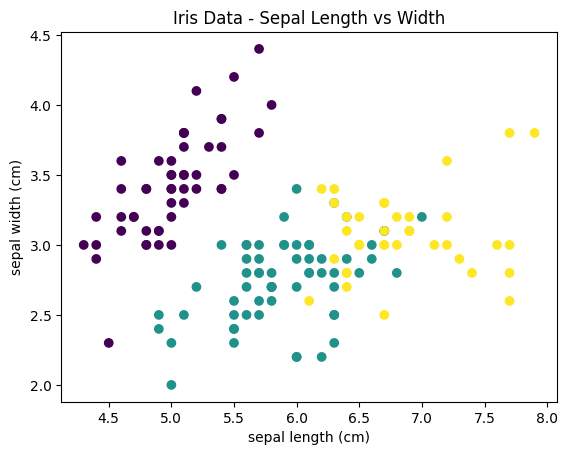

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

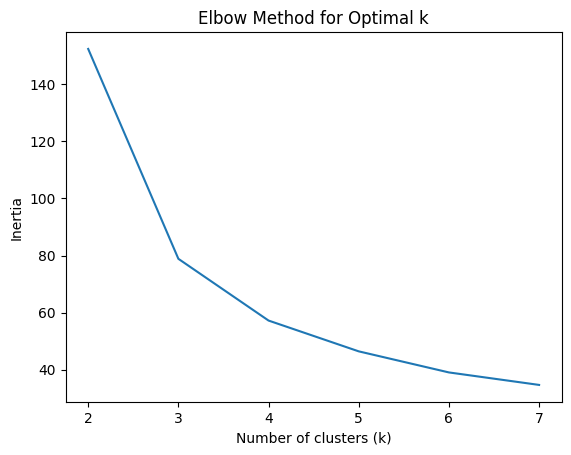

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np

# 아이리스 데이터셋 불러오기
iris = load_iris()

# KMeans 모델 생성 및 데이터 학습
km = KMeans(n_clusters=3, random_state=15)
km.fit(iris.data)

# 클러스터 예측
labels = km.predict(iris.data)

# 클러스터 예측 결과 확인
print(labels)

# 실제 라벨과 예측된 클러스터 라벨을 맞추기 위해 재정렬
# 각 클러스터의 실제 클래스 라벨 확인
from scipy.stats import mode

def match_labels(true_labels, cluster_labels):
    matched_labels = np.zeros_like(cluster_labels)
    for i in range(3):
        mask = (cluster_labels == i)
        matched_labels[mask] = mode(true_labels[mask])[0]
    return matched_labels

# 예측된 라벨을 실제 라벨과 맞추기
matched_labels = match_labels(iris.target, labels)

# 정확도 확인
accuracy = accuracy_score(iris.target, matched_labels)
print(f"Overall accuracy: {accuracy}")

# 아이리스 데이터셋의 일부를 산점도로 시각화
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=matched_labels)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris Data - Sepal Length vs Width')
plt.show()

# 클러스터의 최적 개수 찾기 (엘보우 방법)
inertia = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=15)
    km.fit(iris.data)
    inertia.append(km.inertia_)

# 관성(inertia) 값을 시각화
plt.plot(range(2, 8), inertia)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
